<h1 style="text-align: center;"><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [185]:
df_main = pd.read_csv("Churn_Modelling.csv")
df = df_main.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [187]:
df["Surname"].nunique()

2932

In [188]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"])

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [190]:
df["Exited"].value_counts()

# Data is unbalanced

0    7963
1    2037
Name: Exited, dtype: int64

In [191]:
def categorical_look(column1):
    print(f"Column : {column1}")
    print("----DESCRIBE : --------")
    print(df[column1].describe())
    print("----TOTAL NULL : --------")
    print(df[column1].isnull().sum())
    print("----PERCENTAGE OF NULL : --------")
    print("%",round(df[column1].isnull().sum() / df.shape[0]*100, 2))
    print("----VALUE COUNTS : --------")
    print(df[column1].value_counts(dropna=False))
    print("----NUMBER OF UNIQUES : --------")
    print(df[column1].nunique())   

In [192]:
def numeric_look(column1):
    print(f"Column : {column1}")
    print("----DESCRIBE : --------")
    print(df[column1].describe())
    print("----TOTAL NULL : --------")
    print(df[column1].isnull().sum())
    print("----PERCENTAGE OF NULL : --------")
    print("%",round(df[column1].isnull().sum() / df.shape[0]*100, 2))
    print("----CORELATION : --------")
    print(df.corr()[column1].abs())
    print("----VALUE COUNTS : --------")
    print(df[column1].value_counts(dropna=False))

In [193]:
for i in df.select_dtypes(exclude="object").columns:
    numeric_look(i)

Column : CreditScore
----DESCRIBE : --------
count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64
----TOTAL NULL : --------
0
----PERCENTAGE OF NULL : --------
% 0.0
----CORELATION : --------
CreditScore       1.000
Age               0.004
Tenure            0.001
Balance           0.006
NumOfProducts     0.012
HasCrCard         0.005
IsActiveMember    0.026
EstimatedSalary   0.001
Exited            0.027
Name: CreditScore, dtype: float64
----VALUE COUNTS : --------
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
Column : Age
----DESCRIBE : --------
count   10000.000
mean       38.922
std        10.488
min        18.000
25%        32.000
50%        37.000
75%        44.000
max        92.000
Name: Age, dtype: float64
----TOTAL NULL : --------
0
----

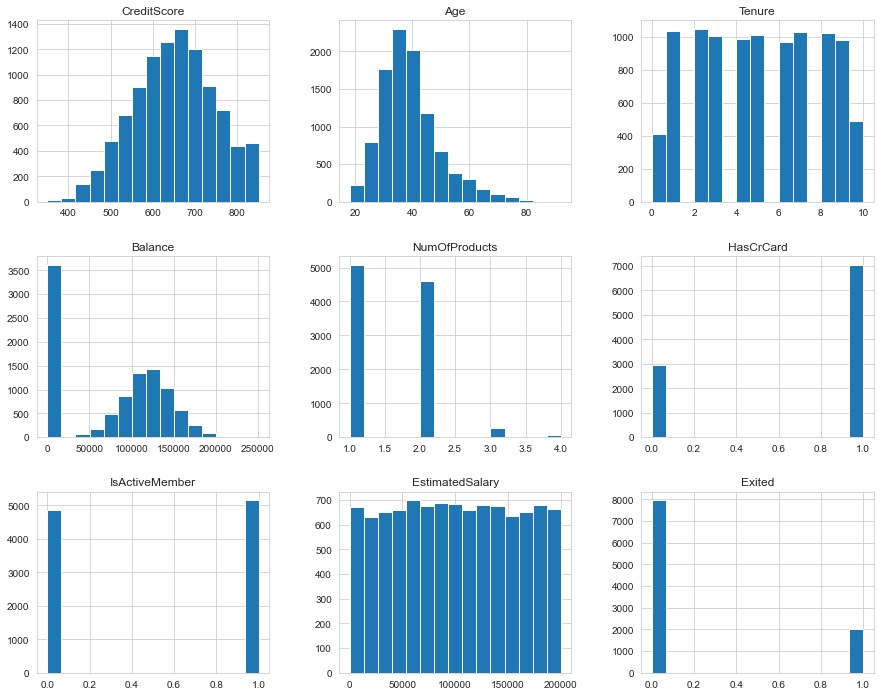

In [194]:
df.hist(figsize=(15, 12), bins=15);

In [195]:
for i in df.select_dtypes("object").columns:
    categorical_look(i)

Column : Geography
----DESCRIBE : --------
count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object
----TOTAL NULL : --------
0
----PERCENTAGE OF NULL : --------
% 0.0
----VALUE COUNTS : --------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----NUMBER OF UNIQUES : --------
3
Column : Gender
----DESCRIBE : --------
count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object
----TOTAL NULL : --------
0
----PERCENTAGE OF NULL : --------
% 0.0
----VALUE COUNTS : --------
Male      5457
Female    4543
Name: Gender, dtype: int64
----NUMBER OF UNIQUES : --------
2


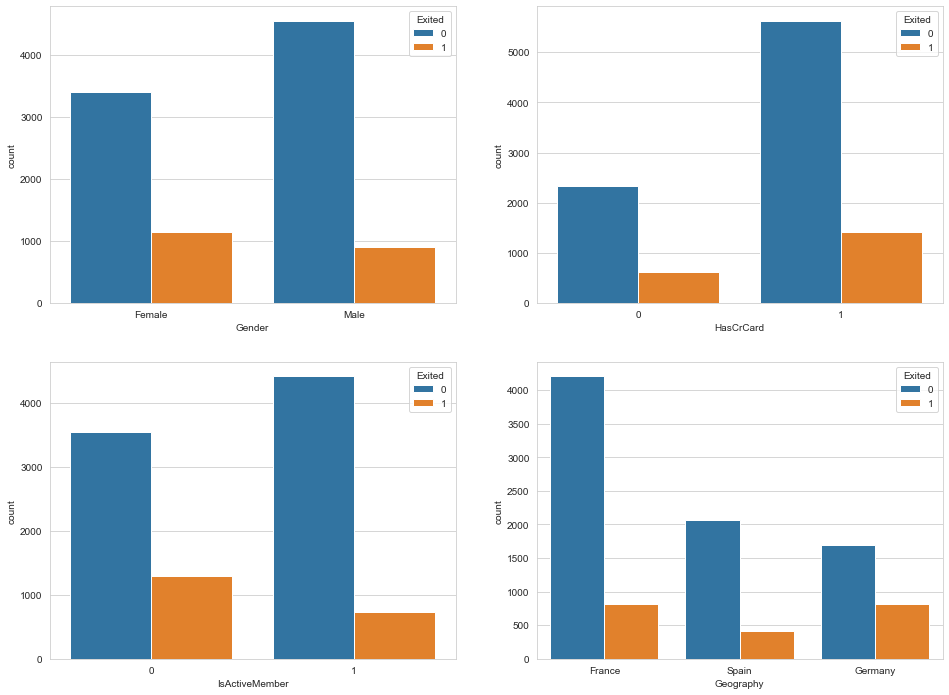

In [196]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

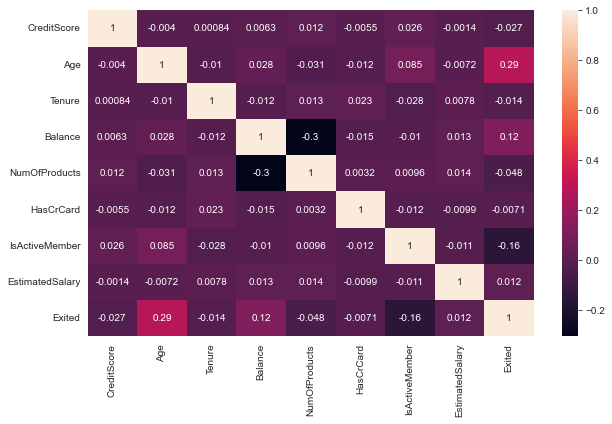

In [197]:
sns.heatmap(df.corr(), annot=True);

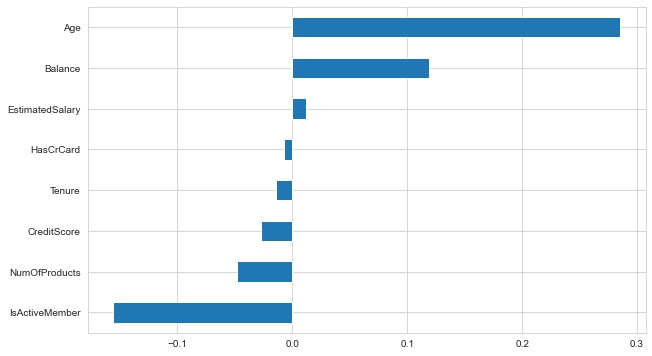

In [198]:
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [199]:
X = df.drop(columns=["Exited"])
y = df['Exited']

In [200]:
from sklearn.model_selection import train_test_split

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9000, 10) (9000,)
Test set: (1000, 10) (1000,)


In [201]:
# from sklearn.preprocessing import OneHotEncoder
# def trans_onehot(X_train, X_test):
    
#     cat = X_train.select_dtypes("object").columns
#     cat = list(cat)
    
#     enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
#     X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
#                            columns = enc.get_feature_names(cat))
    
#     X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
#                                columns = enc.get_feature_names(cat))
    
#     X_train = X_train_cat.join(X_train.select_dtypes("number"))
#     X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    
#     return X_train, X_test

# X_train, X_test = trans_onehot(X_train, X_test)
# print(X_train.shape)
# print(X_test.shape)

In [202]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [203]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="error", sparse=False ,drop="first"), cat), 
                                       remainder=MinMaxScaler())
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [223]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [224]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [225]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=1)

Epoch 1/200
270/270 [==============================] - 7s 13ms/step - loss: 0.5099 - recall: 0.0042 - val_loss: 0.4624 - val_recall: 0.0000e+00
Epoch 2/200
270/270 [==============================] - 3s 10ms/step - loss: 0.4623 - recall: 0.0115 - val_loss: 0.4341 - val_recall: 0.1105
Epoch 3/200
270/270 [==============================] - 2s 9ms/step - loss: 0.4362 - recall: 0.1683 - val_loss: 0.3959 - val_recall: 0.2762
Epoch 4/200
270/270 [==============================] - 2s 9ms/step - loss: 0.4152 - recall: 0.2657 - val_loss: 0.3750 - val_recall: 0.3812
Epoch 5/200
270/270 [==============================] - 2s 8ms/step - loss: 0.4017 - recall: 0.3245 - val_loss: 0.3626 - val_recall: 0.3591
Epoch 6/200
270/270 [==============================] - 2s 7ms/step - loss: 0.3901 - recall: 0.3426 - val_loss: 0.3460 - val_recall: 0.4365
Epoch 7/200
270/270 [==============================] - 2s 7ms/step - loss: 0.3795 - recall: 0.3789 - val_loss: 0.3349 - val_recall: 0.4033
Epoch 8/200
270/270 [

270/270 [==============================] - 1s 4ms/step - loss: 0.3294 - recall: 0.4600 - val_loss: 0.2967 - val_recall: 0.5138
Epoch 60/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3301 - recall: 0.4661 - val_loss: 0.2985 - val_recall: 0.4917
Epoch 61/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3291 - recall: 0.4540 - val_loss: 0.2900 - val_recall: 0.4917
Epoch 62/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3286 - recall: 0.4625 - val_loss: 0.2930 - val_recall: 0.5470
Epoch 63/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3277 - recall: 0.4655 - val_loss: 0.3004 - val_recall: 0.5912
Epoch 64/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3291 - recall: 0.4607 - val_loss: 0.2935 - val_recall: 0.5138
Epoch 65/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3265 - recall: 0.4588 - val_loss: 0.2912 - val_recall: 0.5635
Epoch 66/200
270/270 [===========

270/270 [==============================] - 1s 3ms/step - loss: 0.3194 - recall: 0.4818 - val_loss: 0.2973 - val_recall: 0.5635
Epoch 118/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3194 - recall: 0.4776 - val_loss: 0.2964 - val_recall: 0.5525
Epoch 119/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3200 - recall: 0.4746 - val_loss: 0.2919 - val_recall: 0.5580
Epoch 120/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3209 - recall: 0.4867 - val_loss: 0.2958 - val_recall: 0.5414
Epoch 121/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3187 - recall: 0.4806 - val_loss: 0.3100 - val_recall: 0.6077
Epoch 122/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3199 - recall: 0.4843 - val_loss: 0.2971 - val_recall: 0.4751
Epoch 123/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3195 - recall: 0.4794 - val_loss: 0.3023 - val_recall: 0.5580
Epoch 124/200
270/270 [====

270/270 [==============================] - 1s 4ms/step - loss: 0.3152 - recall: 0.4927 - val_loss: 0.2949 - val_recall: 0.5083
Epoch 176/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3166 - recall: 0.4879 - val_loss: 0.2966 - val_recall: 0.4696
Epoch 177/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3155 - recall: 0.4903 - val_loss: 0.2920 - val_recall: 0.5691
Epoch 178/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3142 - recall: 0.4946 - val_loss: 0.2939 - val_recall: 0.5635
Epoch 179/200
270/270 [==============================] - 1s 4ms/step - loss: 0.3153 - recall: 0.4861 - val_loss: 0.2903 - val_recall: 0.5525
Epoch 180/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3148 - recall: 0.4818 - val_loss: 0.2990 - val_recall: 0.6077
Epoch 181/200
270/270 [==============================] - 1s 3ms/step - loss: 0.3156 - recall: 0.4915 - val_loss: 0.2955 - val_recall: 0.5746
Epoch 182/200
270/270 [====

In [226]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                240       
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________


In [227]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.510,0.004,0.462,0.000
1,0.462,0.012,0.434,0.110
2,0.436,0.168,0.396,0.276
3,0.415,0.266,0.375,0.381
4,0.402,0.324,0.363,0.359


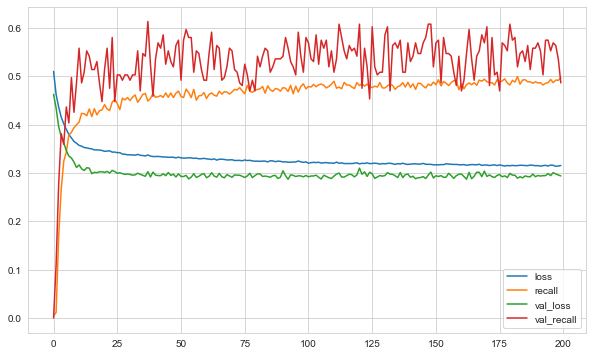

In [228]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [229]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3645097017288208
recall :  0.37254902720451355


In [230]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[769  27]
 [128  76]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.74      0.37      0.50       204

    accuracy                           0.84      1000
   macro avg       0.80      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000



32/32 [==============================] - 0s 2ms/step


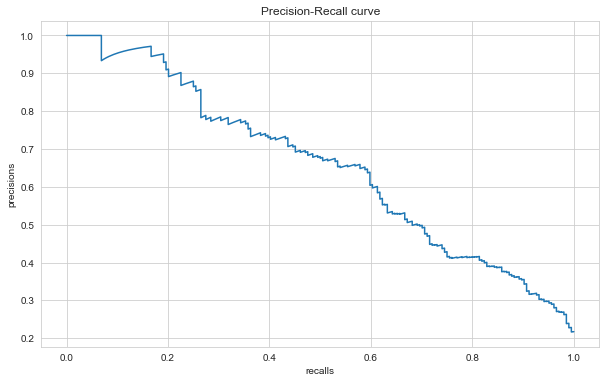

In [231]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [232]:
average_precision_score(y_test, y_pred_proba)

0.6560336281270599

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [233]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [234]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [235]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=5, class_weight=class_weights)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [236]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                240       
                                                                 
 dense_13 (Dense)            (None, 15)                315       
                                                                 
 dense_14 (Dense)            (None, 10)                160       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

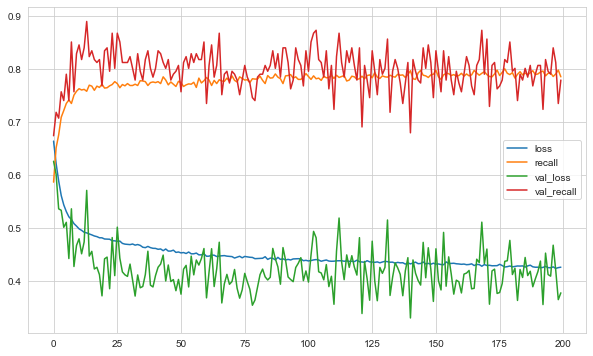

In [237]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [238]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.42963647842407227
recall :  0.7254902124404907


In [239]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[659 137]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       796
           1       0.52      0.73      0.61       204

    accuracy                           0.81      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.81      0.82      1000



32/32 [==============================] - 0s 2ms/step


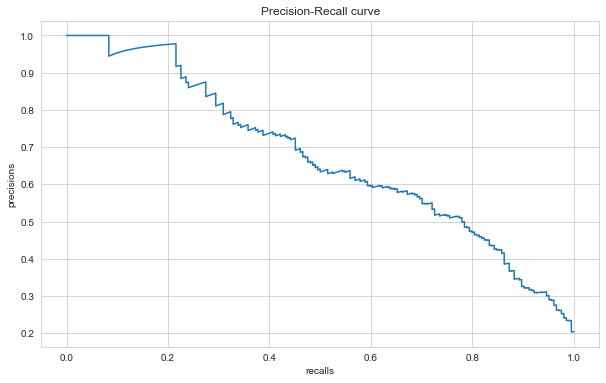

In [240]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [241]:
average_precision_score(y_test, y_pred_proba)

0.6736436147537431

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [249]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=1, class_weight=class_weights)

Epoch 1/200
270/270 [==============================] - 3s 7ms/step - loss: 0.6274 - recall: 0.6495 - val_loss: 0.4659 - val_recall: 0.5249
Epoch 2/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5549 - recall: 0.7149 - val_loss: 0.4246 - val_recall: 0.6851
Epoch 3/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5210 - recall: 0.7458 - val_loss: 0.4908 - val_recall: 0.8287
Epoch 4/200
270/270 [==============================] - 1s 5ms/step - loss: 0.5075 - recall: 0.7615 - val_loss: 0.4380 - val_recall: 0.7845
Epoch 5/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5021 - recall: 0.7476 - val_loss: 0.4592 - val_recall: 0.8122
Epoch 6/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4953 - recall: 0.7573 - val_loss: 0.3910 - val_recall: 0.7403
Epoch 7/200
270/270 [==============================] - 2s 6ms/step - loss: 0.4890 - recall: 0.7615 - val_loss: 0.4225 - val_recall: 0.7956
Epoch 8/200
270/270 [======

270/270 [==============================] - 1s 3ms/step - loss: 0.4388 - recall: 0.7754 - val_loss: 0.4585 - val_recall: 0.8122
Epoch 60/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4392 - recall: 0.7760 - val_loss: 0.4464 - val_recall: 0.7845
Epoch 61/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4382 - recall: 0.7797 - val_loss: 0.4013 - val_recall: 0.7624
Epoch 62/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4389 - recall: 0.7706 - val_loss: 0.4404 - val_recall: 0.8287
Epoch 63/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4381 - recall: 0.7718 - val_loss: 0.4583 - val_recall: 0.8453
Epoch 64/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4413 - recall: 0.7760 - val_loss: 0.4043 - val_recall: 0.7956
Epoch 65/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4368 - recall: 0.7833 - val_loss: 0.3919 - val_recall: 0.7459
Epoch 66/200
270/270 [===========

270/270 [==============================] - 1s 5ms/step - loss: 0.4176 - recall: 0.7924 - val_loss: 0.4314 - val_recall: 0.8122
Epoch 118/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4190 - recall: 0.7857 - val_loss: 0.4476 - val_recall: 0.8232
Epoch 119/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4182 - recall: 0.7930 - val_loss: 0.4446 - val_recall: 0.8287
Epoch 120/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4238 - recall: 0.7803 - val_loss: 0.4218 - val_recall: 0.7790
Epoch 121/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4167 - recall: 0.7863 - val_loss: 0.4657 - val_recall: 0.8453
Epoch 122/200
270/270 [==============================] - 1s 5ms/step - loss: 0.4164 - recall: 0.7936 - val_loss: 0.3820 - val_recall: 0.7072
Epoch 123/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4170 - recall: 0.7984 - val_loss: 0.4261 - val_recall: 0.8066
Epoch 124/200
270/270 [====

270/270 [==============================] - 1s 4ms/step - loss: 0.4106 - recall: 0.8075 - val_loss: 0.4193 - val_recall: 0.7845
Epoch 176/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4076 - recall: 0.7972 - val_loss: 0.4243 - val_recall: 0.7624
Epoch 177/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4080 - recall: 0.8008 - val_loss: 0.4383 - val_recall: 0.8122
Epoch 178/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4014 - recall: 0.8015 - val_loss: 0.4257 - val_recall: 0.7901
Epoch 179/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4061 - recall: 0.8063 - val_loss: 0.4358 - val_recall: 0.8232
Epoch 180/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4044 - recall: 0.8045 - val_loss: 0.4689 - val_recall: 0.8398
Epoch 181/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4046 - recall: 0.8093 - val_loss: 0.4300 - val_recall: 0.7901
Epoch 182/200
270/270 [====

In [251]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                240       
                                                                 
 dense_21 (Dense)            (None, 15)                315       
                                                                 
 dense_22 (Dense)            (None, 10)                160       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________


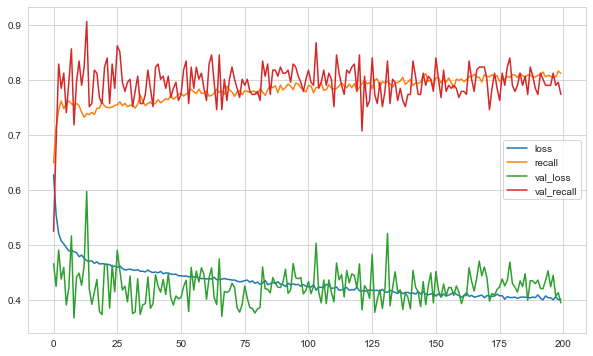

In [252]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [253]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.46224865317344666
recall :  0.7941176295280457
----------------------------------------------------------------------------------------------------
32/32 [==============================] - 0s 2ms/step
[[621 175]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       796
           1       0.48      0.79      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.78      0.80      1000



32/32 [==============================] - 0s 3ms/step


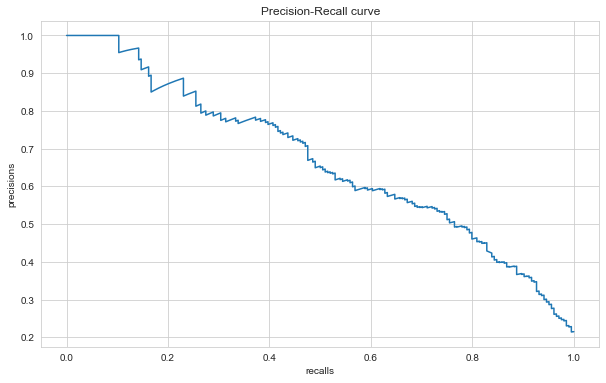

In [254]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [255]:
average_precision_score(y_test, y_pred_proba)

0.6663102087795229

### Add Dropout Layer

In [256]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=1, class_weight=class_weights)

Epoch 1/200
270/270 [==============================] - 3s 5ms/step - loss: 0.6822 - recall: 0.4873 - val_loss: 0.6412 - val_recall: 0.6133
Epoch 2/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6571 - recall: 0.5720 - val_loss: 0.6377 - val_recall: 0.7072
Epoch 3/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6452 - recall: 0.6301 - val_loss: 0.5886 - val_recall: 0.6851
Epoch 4/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6285 - recall: 0.6332 - val_loss: 0.5799 - val_recall: 0.7127
Epoch 5/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6137 - recall: 0.6731 - val_loss: 0.5668 - val_recall: 0.7348
Epoch 6/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6093 - recall: 0.6610 - val_loss: 0.5393 - val_recall: 0.6961
Epoch 7/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5943 - recall: 0.6889 - val_loss: 0.5561 - val_recall: 0.7569
Epoch 8/200
270/270 [======

270/270 [==============================] - 1s 3ms/step - loss: 0.4892 - recall: 0.7669 - val_loss: 0.4452 - val_recall: 0.8343
Epoch 60/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4944 - recall: 0.7694 - val_loss: 0.4459 - val_recall: 0.8343
Epoch 61/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4901 - recall: 0.7718 - val_loss: 0.4317 - val_recall: 0.8232
Epoch 62/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4923 - recall: 0.7615 - val_loss: 0.4686 - val_recall: 0.8508
Epoch 63/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4860 - recall: 0.7706 - val_loss: 0.4469 - val_recall: 0.8287
Epoch 64/200
270/270 [==============================] - 1s 5ms/step - loss: 0.4902 - recall: 0.7615 - val_loss: 0.4540 - val_recall: 0.8343
Epoch 65/200
270/270 [==============================] - 1s 5ms/step - loss: 0.4853 - recall: 0.7766 - val_loss: 0.4090 - val_recall: 0.8122
Epoch 66/200
270/270 [===========

270/270 [==============================] - 1s 5ms/step - loss: 0.4791 - recall: 0.7548 - val_loss: 0.4302 - val_recall: 0.8177
Epoch 118/200
270/270 [==============================] - 1s 5ms/step - loss: 0.4781 - recall: 0.7500 - val_loss: 0.4236 - val_recall: 0.8177
Epoch 119/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4783 - recall: 0.7573 - val_loss: 0.4682 - val_recall: 0.8232
Epoch 120/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4801 - recall: 0.7621 - val_loss: 0.4116 - val_recall: 0.7901
Epoch 121/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4845 - recall: 0.7567 - val_loss: 0.4570 - val_recall: 0.8343
Epoch 122/200
270/270 [==============================] - 1s 5ms/step - loss: 0.4822 - recall: 0.7748 - val_loss: 0.4070 - val_recall: 0.8011
Epoch 123/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4782 - recall: 0.7597 - val_loss: 0.4239 - val_recall: 0.8177
Epoch 124/200
270/270 [====

270/270 [==============================] - 1s 3ms/step - loss: 0.4758 - recall: 0.7615 - val_loss: 0.4255 - val_recall: 0.8122
Epoch 176/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4778 - recall: 0.7815 - val_loss: 0.4087 - val_recall: 0.7956
Epoch 177/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4734 - recall: 0.7657 - val_loss: 0.4468 - val_recall: 0.8453
Epoch 178/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4742 - recall: 0.7573 - val_loss: 0.4336 - val_recall: 0.8122
Epoch 179/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4751 - recall: 0.7748 - val_loss: 0.4179 - val_recall: 0.7956
Epoch 180/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4785 - recall: 0.7682 - val_loss: 0.4081 - val_recall: 0.8066
Epoch 181/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4761 - recall: 0.7700 - val_loss: 0.4353 - val_recall: 0.8232
Epoch 182/200
270/270 [====

In [257]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                240       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                160       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

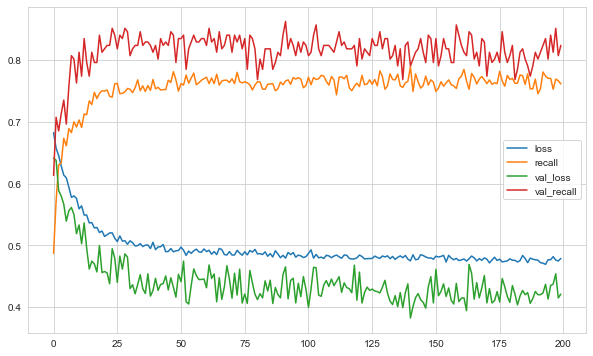

In [258]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [259]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.4640037715435028
recall :  0.7598039507865906
----------------------------------------------------------------------------------------------------
32/32 [==============================] - 0s 4ms/step
[[618 178]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       796
           1       0.47      0.76      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



32/32 [==============================] - 0s 4ms/step


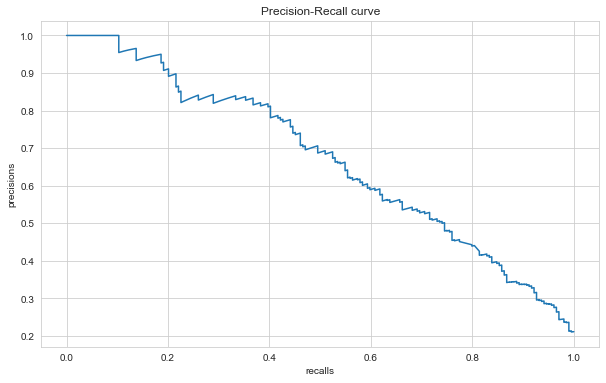

In [260]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [261]:
average_precision_score(y_test, y_pred_proba)

0.6717355672877149

### Add Early Stop

#### Monitor the "val_loss" as metric

In [269]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=1, class_weight=class_weights, callbacks = [early_stop])



Epoch 1/200
270/270 [==============================] - 2s 4ms/step - loss: 0.6274 - recall: 0.6495 - val_loss: 0.4659 - val_recall: 0.5249
Epoch 2/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5549 - recall: 0.7149 - val_loss: 0.4246 - val_recall: 0.6851
Epoch 3/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5210 - recall: 0.7458 - val_loss: 0.4908 - val_recall: 0.8287
Epoch 4/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5075 - recall: 0.7615 - val_loss: 0.4380 - val_recall: 0.7845
Epoch 5/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5021 - recall: 0.7476 - val_loss: 0.4592 - val_recall: 0.8122
Epoch 6/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4953 - recall: 0.7573 - val_loss: 0.3910 - val_recall: 0.7403
Epoch 7/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4890 - recall: 0.7615 - val_loss: 0.4225 - val_recall: 0.7956
Epoch 8/200
270/270 [======

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                240       
                                                                 
 dense_41 (Dense)            (None, 15)                315       
                                                                 
 dense_42 (Dense)            (None, 10)                160       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________
None


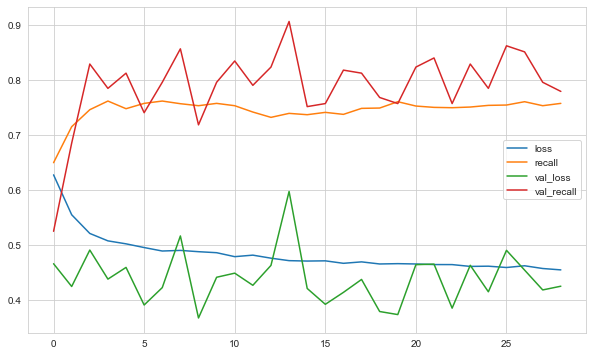

In [270]:
print(model.summary())
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [271]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.4006643295288086
recall :  0.6029411554336548
----------------------------------------------------------------------------------------------------
32/32 [==============================] - 0s 2ms/step
[[681 115]
 [ 81 123]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       796
           1       0.52      0.60      0.56       204

    accuracy                           0.80      1000
   macro avg       0.71      0.73      0.72      1000
weighted avg       0.82      0.80      0.81      1000



#### Monitor the "val_recall" as metric

In [272]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 20, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 200, verbose=1, class_weight=class_weights, callbacks = [early_stop])

Epoch 1/200
270/270 [==============================] - 3s 5ms/step - loss: 0.6274 - recall: 0.6495 - val_loss: 0.4659 - val_recall: 0.5249
Epoch 2/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5549 - recall: 0.7149 - val_loss: 0.4246 - val_recall: 0.6851
Epoch 3/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5210 - recall: 0.7458 - val_loss: 0.4908 - val_recall: 0.8287
Epoch 4/200
270/270 [==============================] - 1s 5ms/step - loss: 0.5075 - recall: 0.7615 - val_loss: 0.4380 - val_recall: 0.7845
Epoch 5/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5021 - recall: 0.7476 - val_loss: 0.4592 - val_recall: 0.8122
Epoch 6/200
270/270 [==============================] - 1s 4ms/step - loss: 0.4953 - recall: 0.7573 - val_loss: 0.3910 - val_recall: 0.7403
Epoch 7/200
270/270 [==============================] - 1s 3ms/step - loss: 0.4890 - recall: 0.7615 - val_loss: 0.4225 - val_recall: 0.7956
Epoch 8/200
270/270 [======

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 20)                240       
                                                                 
 dense_45 (Dense)            (None, 15)                315       
                                                                 
 dense_46 (Dense)            (None, 10)                160       
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________
None


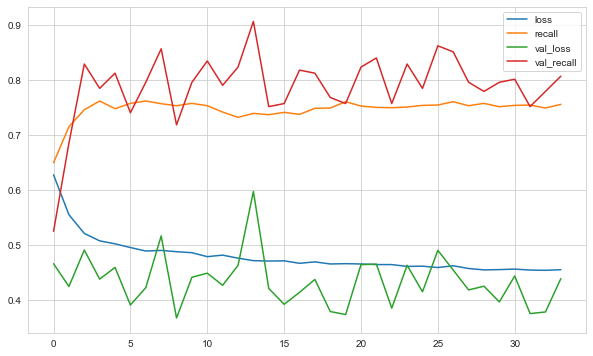

In [273]:
print(model.summary())
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [275]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)
print("-----"*20)
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss :  0.6279158592224121
recall :  0.8676470518112183
----------------------------------------------------------------------------------------------------
32/32 [==============================] - 0s 4ms/step
[[483 313]
 [ 27 177]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       796
           1       0.36      0.87      0.51       204

    accuracy                           0.66      1000
   macro avg       0.65      0.74      0.62      1000
weighted avg       0.83      0.66      0.69      1000



## GridSearchCV

In [287]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation="relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(10, activation="relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(1, activation="sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [288]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 20, restore_best_weights = True)
tf.random.set_seed(seed)
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [30, 60],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.001, 0.005, 0.01]}

grid_model = GridSearchCV(estimator = classifier_model, param_grid = parameters, scoring = 'recall',
                          cv = 5, n_jobs = -1, verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Epoch 1/200
270/270 [==============================] - 2s 4ms/step - loss: 0.6489 - recall: 0.6253 - val_loss: 0.5368 - val_recall: 0.5691
Epoch 2/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5996 - recall: 0.6640 - val_loss: 0.5007 - val_recall: 0.7238
Epoch 3/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5667 - recall: 0.6877 - val_loss: 0.5263 - val_recall: 0.8564
Epoch 4/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5414 - recall: 0.7125 - val_loss: 0.4613 - val_recall: 0.7901
Epoch 5/200
270/270 [==============================] - 1s 3ms/step - loss: 0.5434 - recall: 0.7028 - val_loss: 0.4364 - val_recall: 0.7735
Epoch 6/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5423 - recall: 0.7149 - val_loss: 0.4933 - val_recall: 0.8453
Epoch 7/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5312 - recall: 0.7173 - val_

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020C914BAA90>,
             n_jobs=-1,
             param_grid={'batch_size': [30, 60],
                         'learn_rate': [0.001, 0.005, 0.01],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall', verbose=1)

In [289]:
print(grid_model.best_score_)
print(grid_model.best_params_)


0.860154541136682
{'batch_size': 30, 'learn_rate': 0.01, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>}


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [290]:
y_pred = grid_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 5ms/step
[[538 258]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       796
           1       0.39      0.80      0.52       204

    accuracy                           0.70      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.70      0.73      1000



32/32 [==============================] - 0s 4ms/step


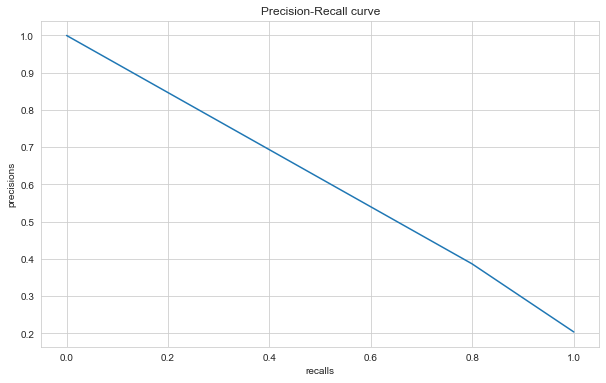

In [291]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [292]:
average_precision_score(y_test, y_pred_proba)

0.3503591355782218

# Final Model and Model Deployment

In [293]:
import pickle

pickle.dump(column_trans, open("column_transformation_churn", 'wb'))

In [294]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = RMSprop(lr=0.01)

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=20,restore_best_weights = True)
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=30,
          epochs=200, verbose=1, class_weight=class_weights)

Epoch 1/200
300/300 [==============================] - 3s 6ms/step - loss: 0.6099 - recall: 0.6672 - val_loss: 0.5429 - val_recall: 0.6667
Epoch 2/200
300/300 [==============================] - 1s 4ms/step - loss: 0.5415 - recall: 0.7441 - val_loss: 0.5196 - val_recall: 0.7892
Epoch 3/200
300/300 [==============================] - 1s 4ms/step - loss: 0.5058 - recall: 0.7414 - val_loss: 0.5032 - val_recall: 0.7500
Epoch 4/200
300/300 [==============================] - 1s 4ms/step - loss: 0.4997 - recall: 0.7409 - val_loss: 0.5250 - val_recall: 0.7696
Epoch 5/200
300/300 [==============================] - 1s 4ms/step - loss: 0.4951 - recall: 0.7349 - val_loss: 0.4093 - val_recall: 0.6422
Epoch 6/200
300/300 [==============================] - 1s 4ms/step - loss: 0.4913 - recall: 0.7278 - val_loss: 0.4635 - val_recall: 0.7206
Epoch 7/200
300/300 [==============================] - 1s 4ms/step - loss: 0.4883 - recall: 0.7289 - val_loss: 0.4586 - val_recall: 0.7059
Epoch 8/200
300/300 [======

In [295]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[553 243]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.80       796
           1       0.40      0.81      0.54       204

    accuracy                           0.72      1000
   macro avg       0.67      0.75      0.67      1000
weighted avg       0.83      0.72      0.74      1000



In [296]:
model.save('model_churn.h5')

## Prediction

In [312]:
from tensorflow.keras.models import load_model

model_churn = load_model('model_churn.h5')

customer1 = X_test[0].reshape(1,11)
y_pred = (model_churn.predict(customer1) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 114ms/step


array([[1]])

In [313]:
y.iloc[0]

1